# Loan Eligibility EDA
## Dataset Overview

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('dataset/train.csv')
print(f'Training Data Shape: {train.shape}')
train.head()

Training Data Shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Missing Values Analysis

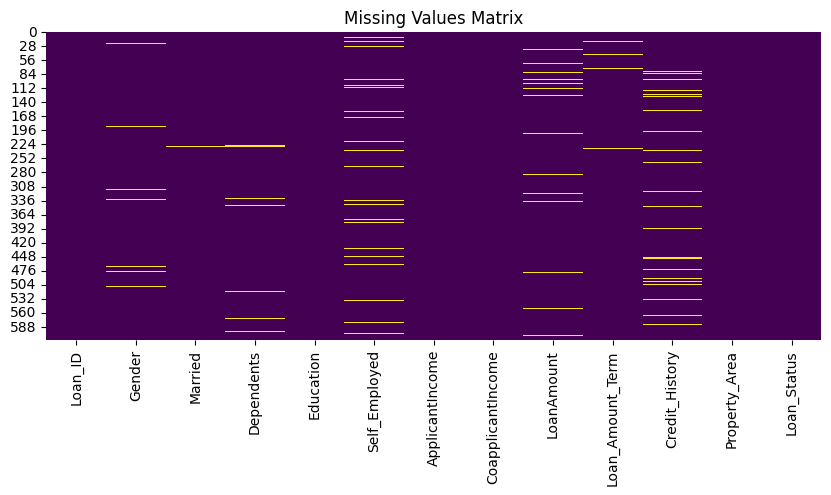

In [4]:
plt.figure(figsize=(10,4))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Matrix');

## Target Variable Distribution

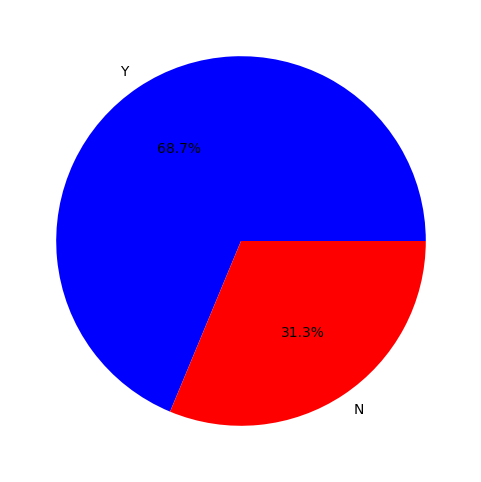

In [17]:
plt.figure(figsize=(6,6))
train['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%', 
                                           colors=['blue','red'])
plt.ylabel('');

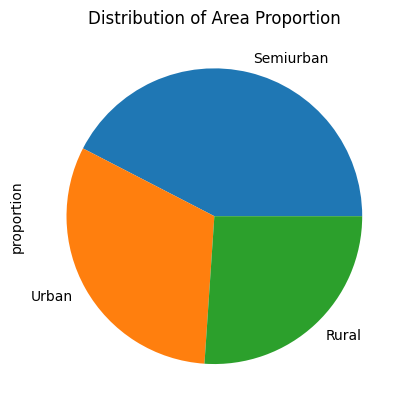

In [20]:
train[train['Loan_Status'] == 'Y']['Property_Area']\
    .value_counts(normalize=True)\
    .plot(kind='pie', title='Distribution of Area Proportion');

## Categorical Features Analysis

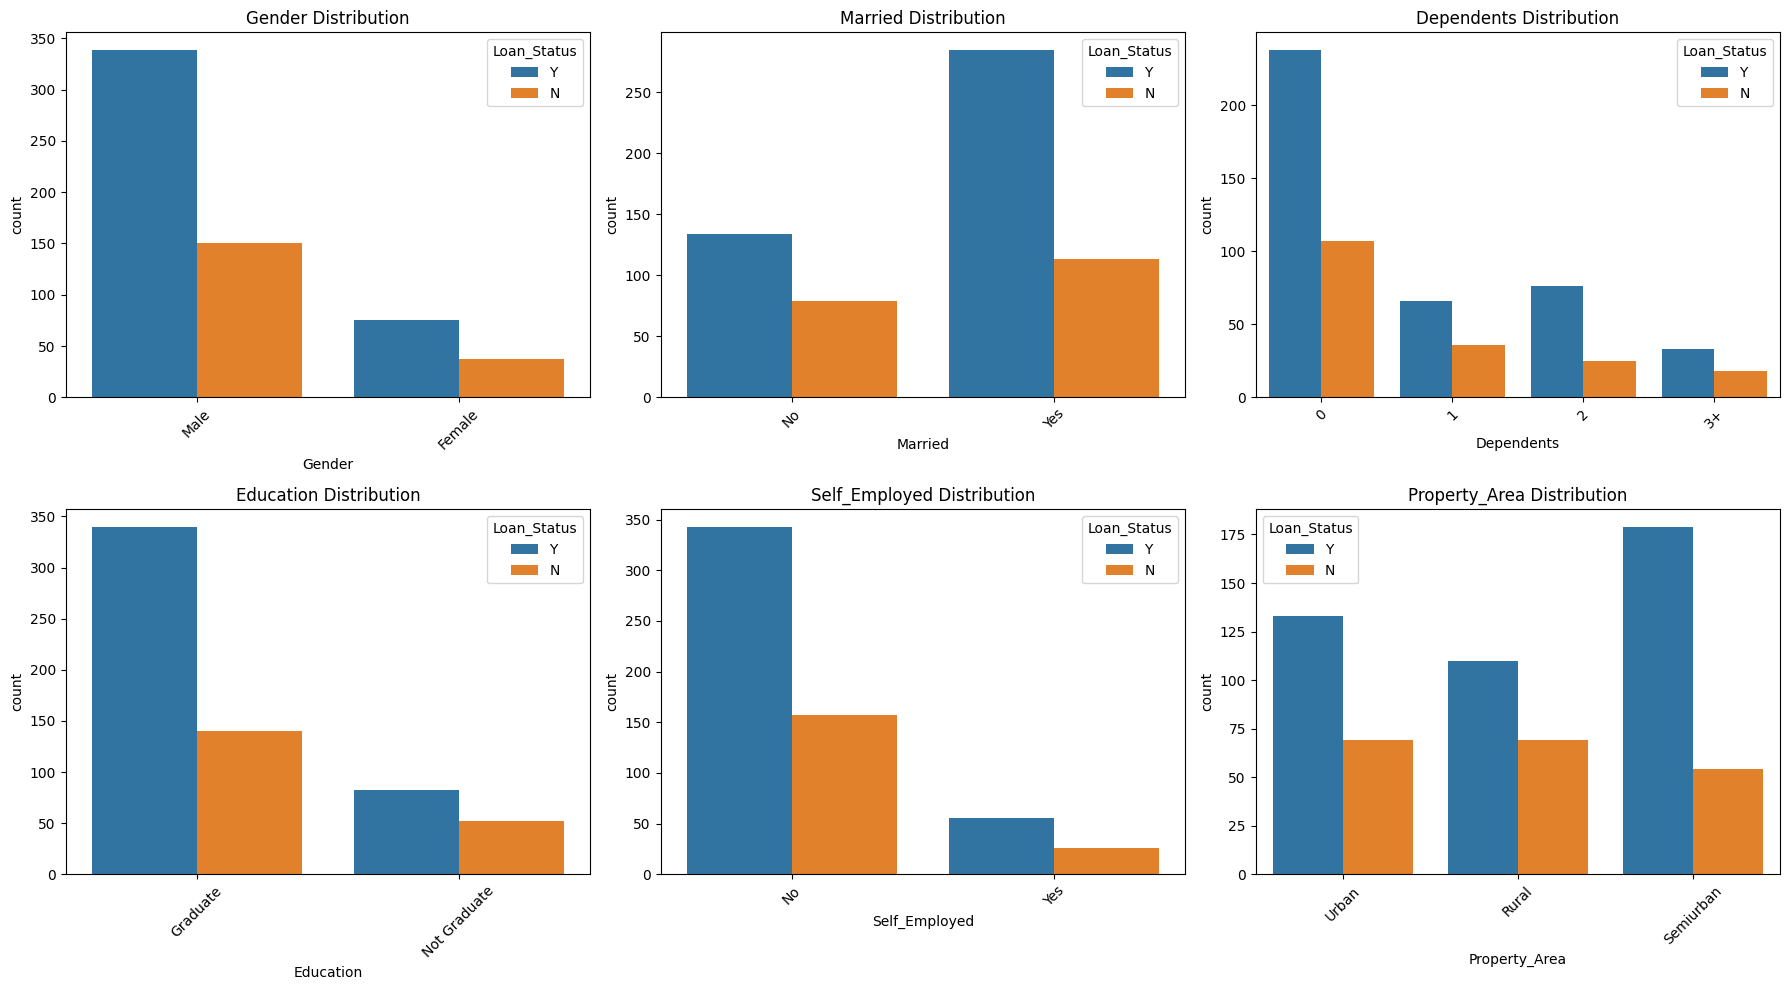

In [6]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for ax, col in zip(axes.flatten(), categorical):
    sns.countplot(x=col, hue='Loan_Status', data=train, ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

## Numerical Features Analysis

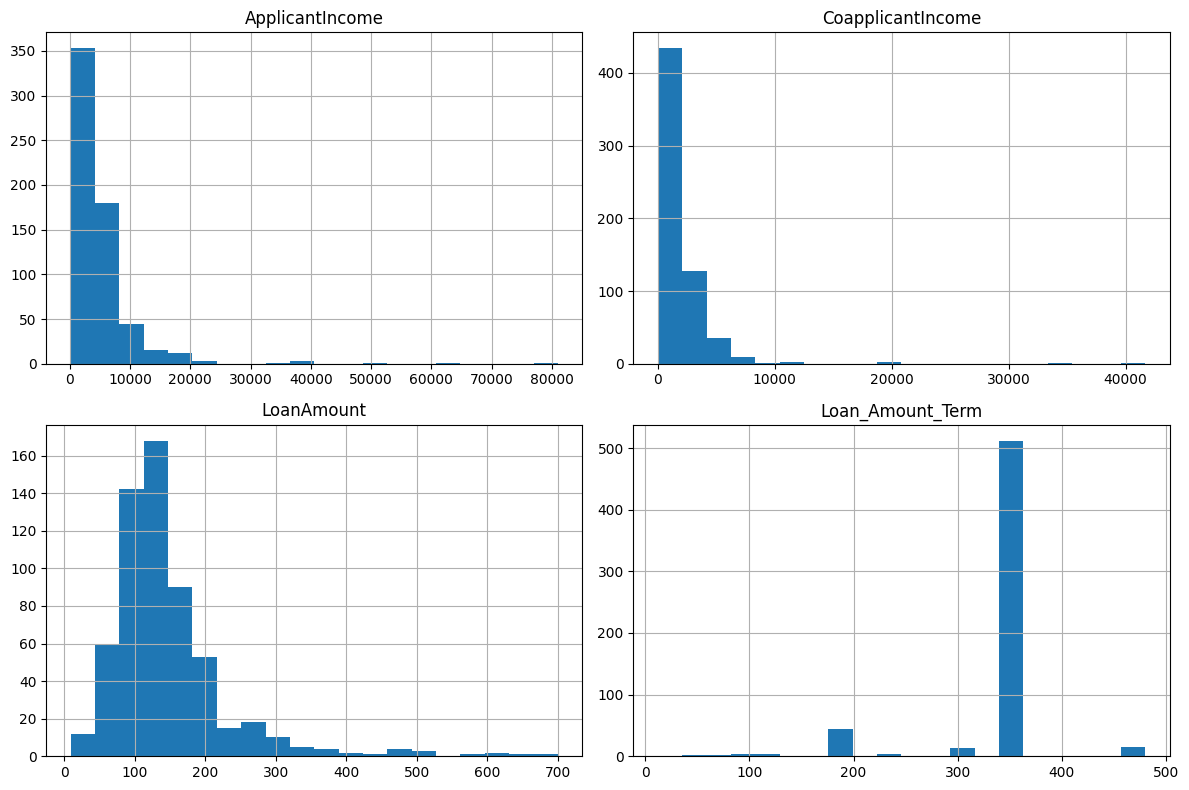

In [7]:
numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
train[numerical].hist(bins=20, figsize=(12,8))
plt.tight_layout()

## Income vs Loan Status

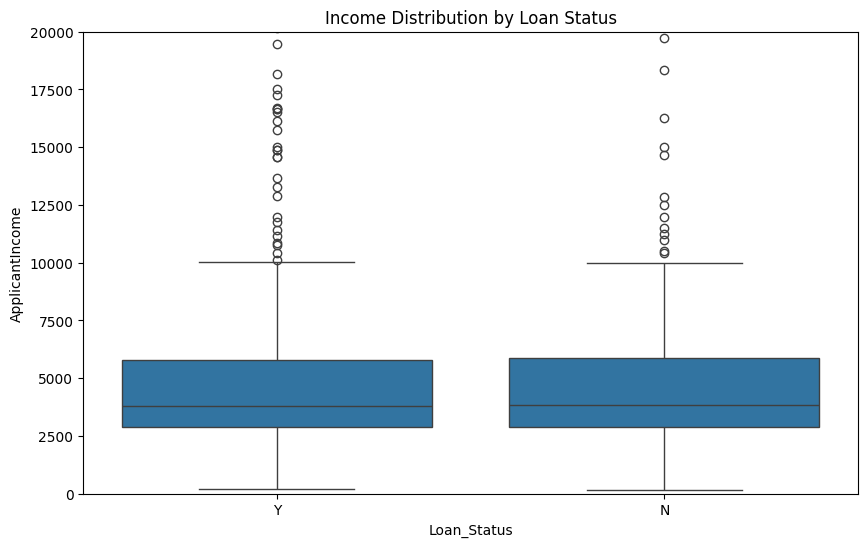

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train)
plt.ylim(0, 20000)
plt.title('Income Distribution by Loan Status');

## Correlation Analysis

In [14]:
encoded = train.copy()
for col in categorical:
    encoded[col] = LabelEncoder().fit_transform(encoded[col])

plt.figure(figsize=(10,8))
sns.heatmap(encoded.reset_index().corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix');

ValueError: could not convert string to float: 'LP001002'

<Figure size 1000x800 with 0 Axes>